In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load JSON data
gini_filepath = './results/gini_components_by_year.json'
with open(gini_filepath) as f:
    data = json.load(f)

In [3]:
df = pd.DataFrame.from_dict(data, orient='index')

# Calculate percentage contributions
df['exploitation_percent'] = (df['exploitation'] / df['total']) * 100
df['exclusion_percent'] = (df['exclusion'] / df['total']) * 100
df['patronage_percent'] = (df['patronage'] / df['total']) * 100
df['rationing_percent'] = (df['rationing'] / df['total']) * 100

# Reset index to have 'year' as a column
df.reset_index(inplace=True)
df.rename(columns={'index': 'year'}, inplace=True)

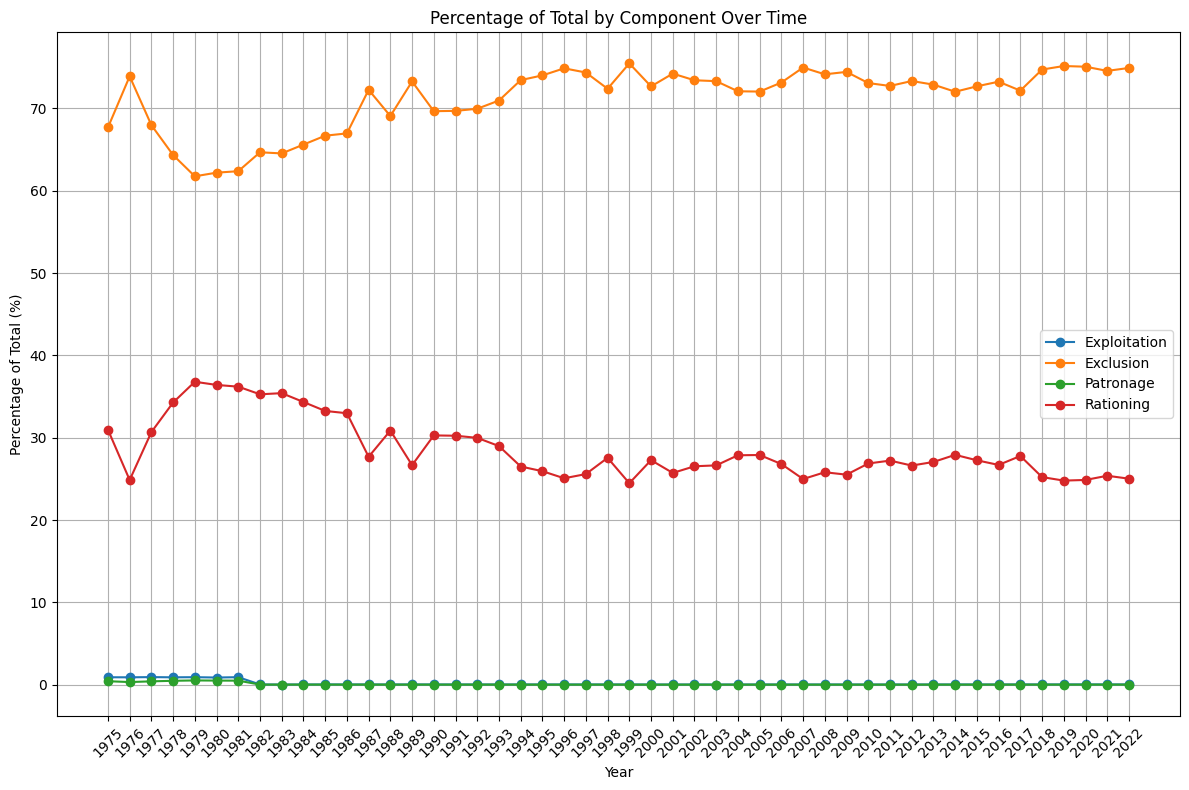

In [12]:
# Line graph
plt.figure(figsize=(12, 8))

plt.plot(df['year'], df['exploitation_percent'], label='Exploitation', marker='o')
plt.plot(df['year'], df['exclusion_percent'], label='Exclusion', marker='o')
plt.plot(df['year'], df['patronage_percent'], label='Patronage', marker='o')
plt.plot(df['year'], df['rationing_percent'], label='Rationing', marker='o')

plt.xlabel('Year')
plt.ylabel('Percentage of Total (%)')
plt.title('Percentage of Total by Component Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

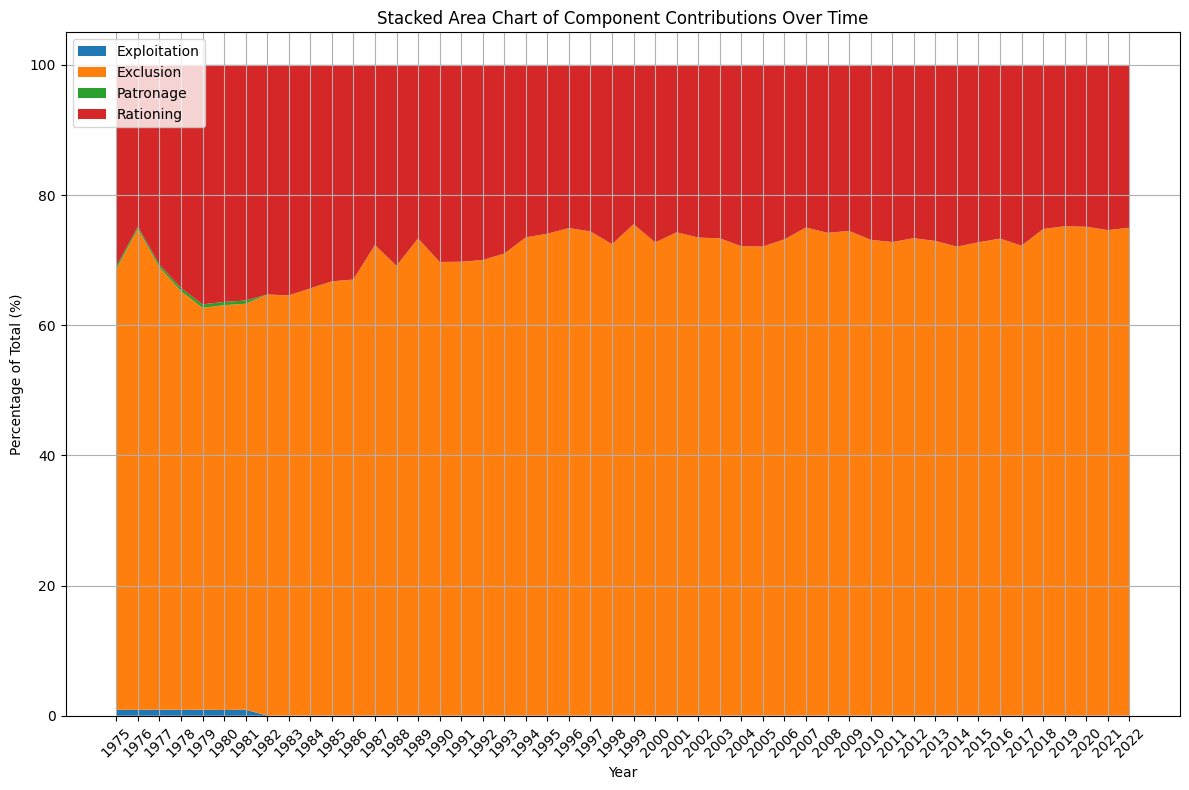

In [7]:
# stacked area chart
df_sorted = df.sort_values('year')
plt.figure(figsize=(12, 8))
plt.stackplot(df_sorted['year'], 
              df_sorted['exploitation_percent'], 
              df_sorted['exclusion_percent'], 
              df_sorted['patronage_percent'], 
              df_sorted['rationing_percent'], 
              labels=['Exploitation', 'Exclusion', 'Patronage', 'Rationing'])

plt.xlabel('Year')
plt.ylabel('Percentage of Total (%)')
plt.title('Stacked Area Chart of Component Contributions Over Time')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

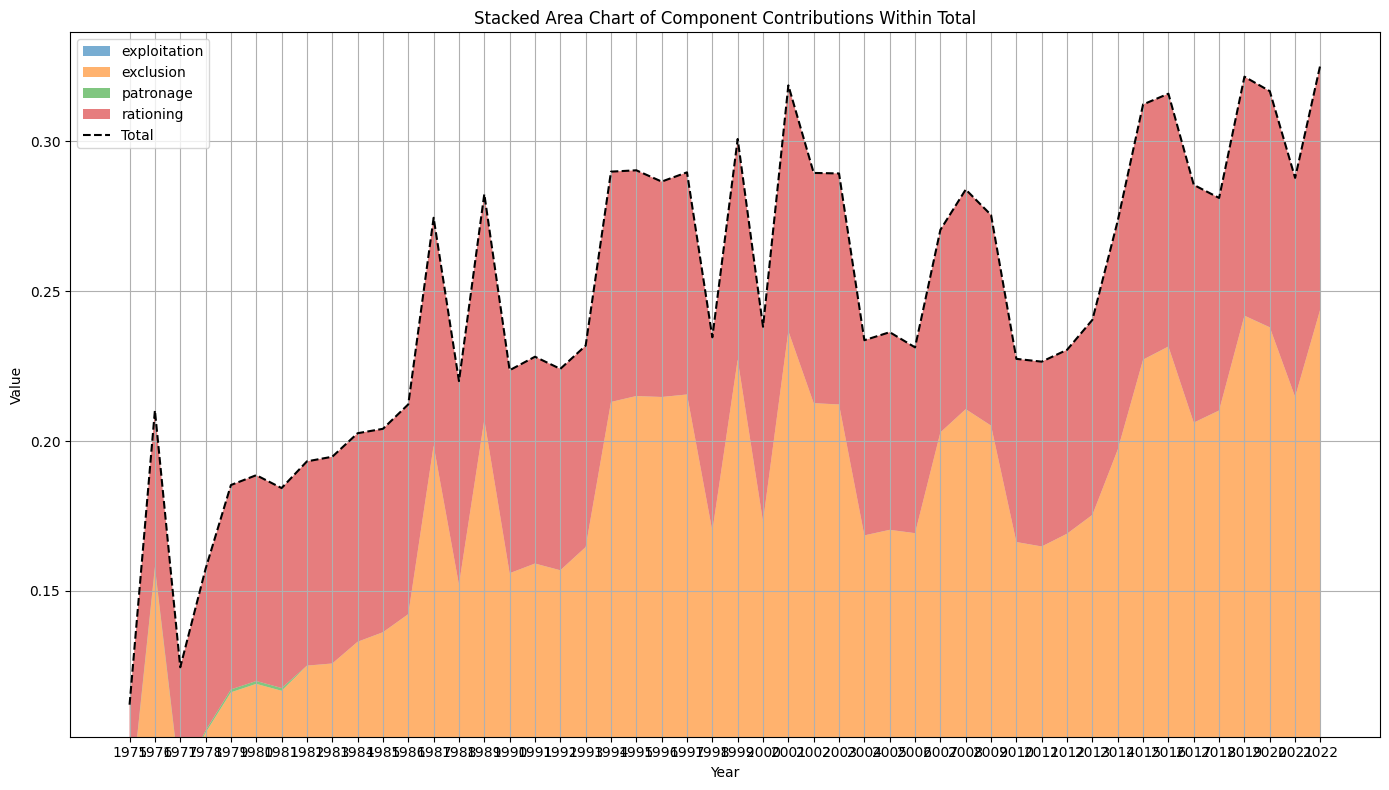

In [10]:
components = ['exploitation', 'exclusion', 'patronage', 'rationing']

# Create the stacked area chart
plt.figure(figsize=(14, 8))
plt.stackplot(df.index, 
              df[components].T, 
              labels=components,
              alpha=0.6)

# Plot the total value as a line
plt.plot(df.year, df['total'], color='black', linestyle='--', label='Total')

# Formatting
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Stacked Area Chart of Component Contributions Within Total')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

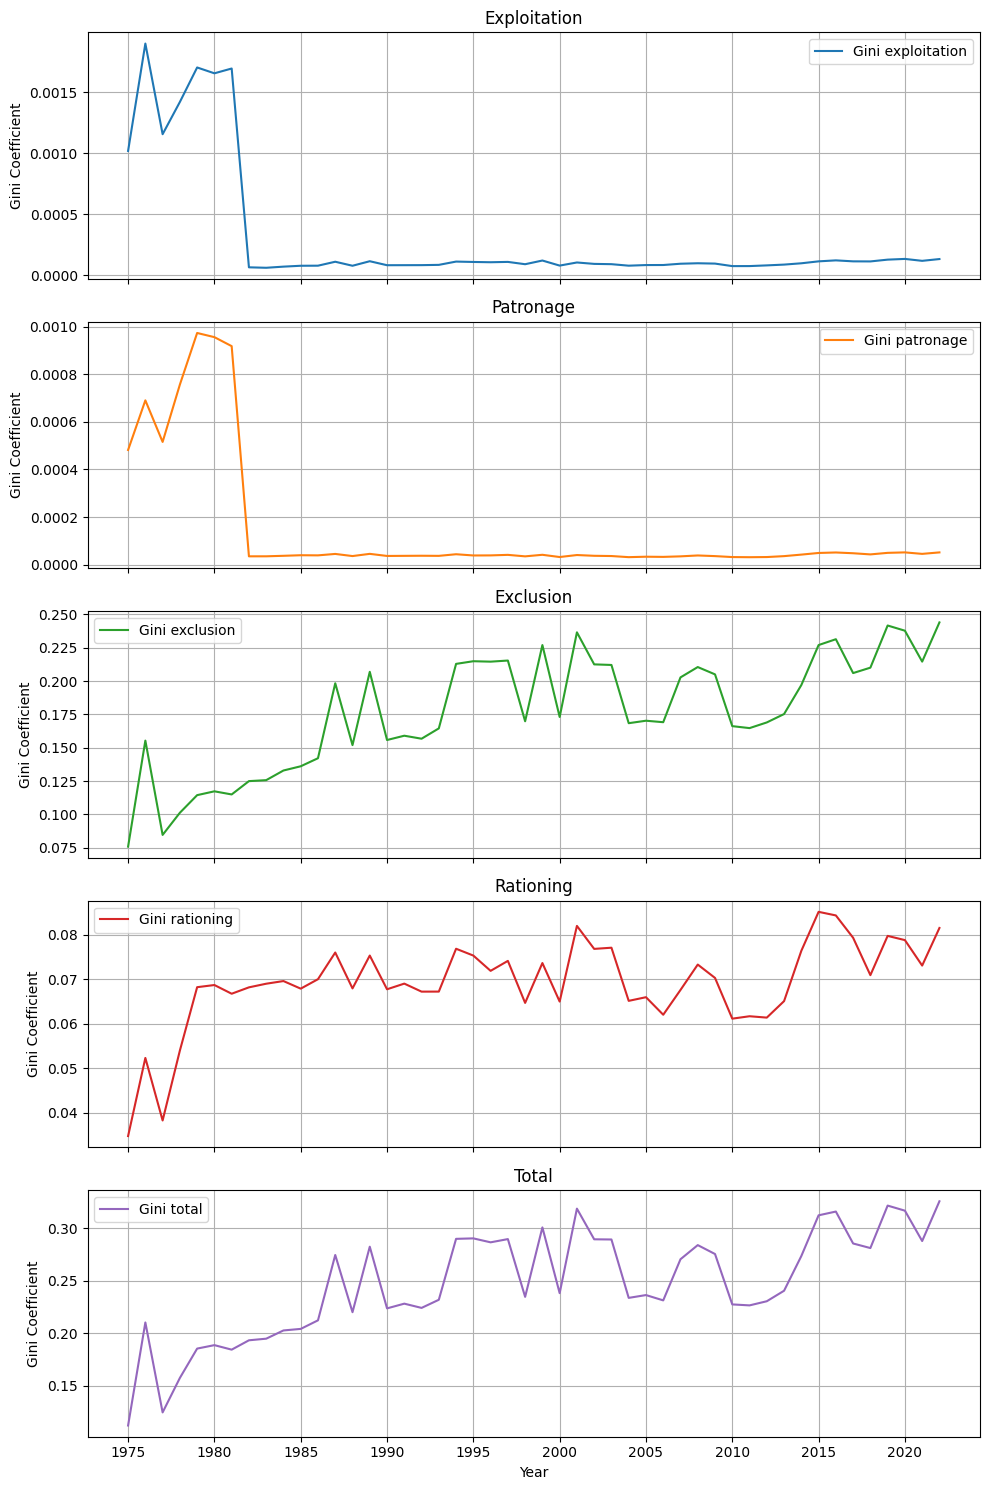

In [24]:
components = ['exploitation', 'patronage', 'exclusion', 'rationing', 'total']

# Plotting
fig, axs = plt.subplots(len(components), 1, figsize=(10, 15), sharex=True)

for i, component in enumerate(components):
    axs[i].plot(df['year'], df[component], label=f'Gini {component}', color=f'C{i}')
    axs[i].set_title(f'{component.capitalize()}')
    axs[i].set_ylabel('Gini Coefficient')
    # axs[i].set_ylim(0, 1)
    axs[i].grid(True)
    axs[i].legend()
    axs[i].set_xticks(df['year'][::5])

axs[-1].set_xlabel('Year')
plt.tight_layout()
plt.show()

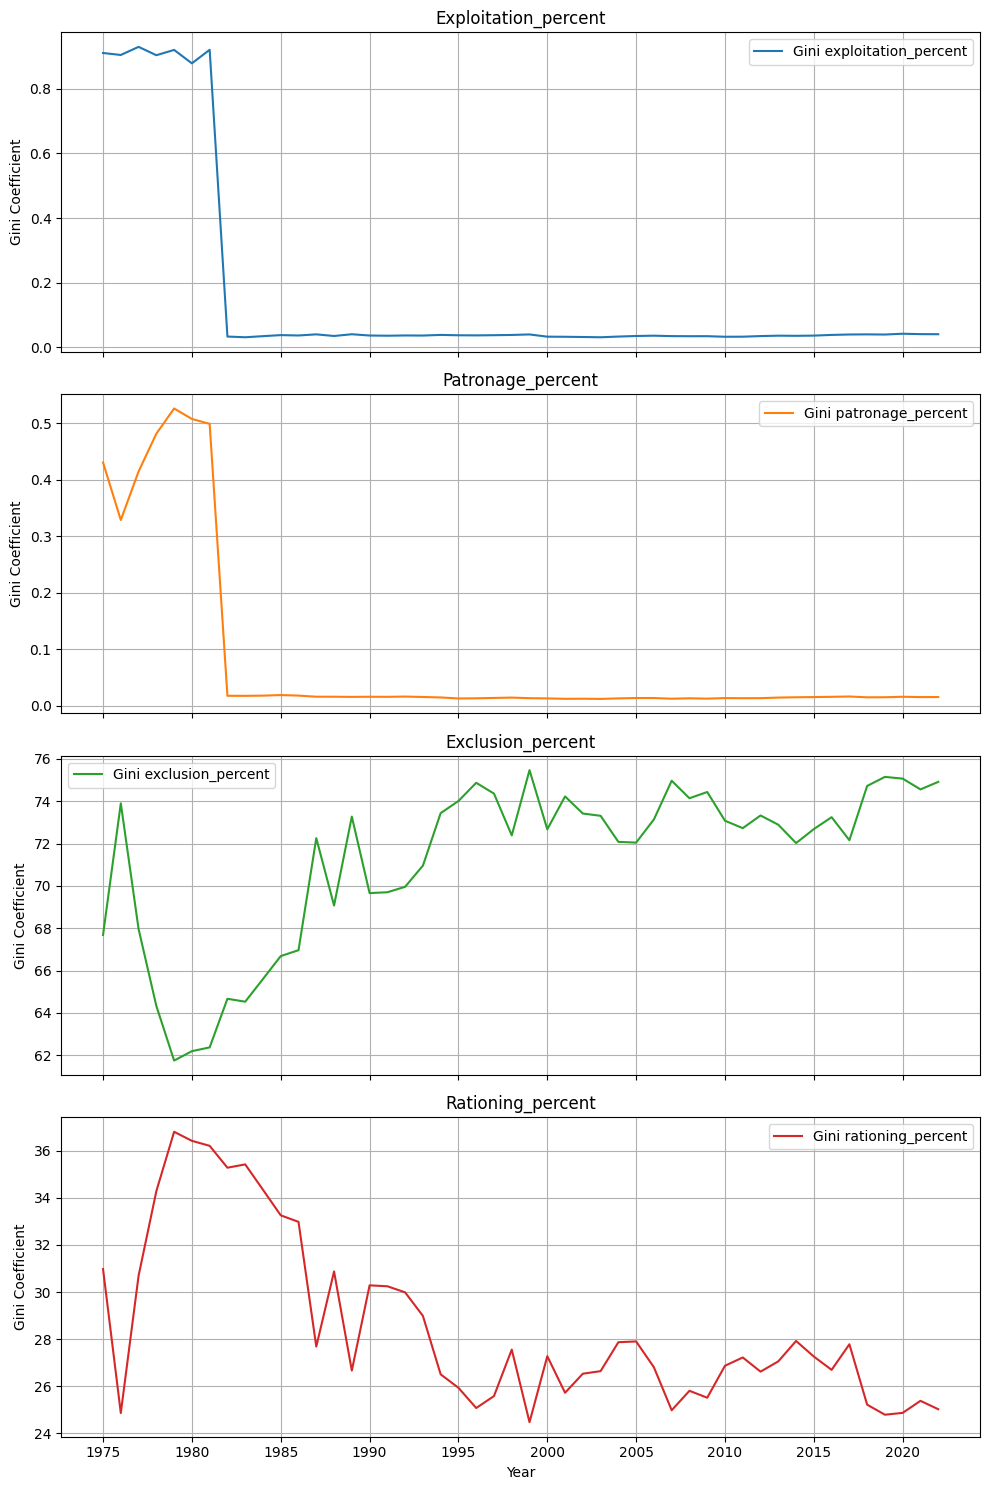

In [25]:
components = ['exploitation_percent', 'patronage_percent', 'exclusion_percent', 'rationing_percent']

# Plotting
fig, axs = plt.subplots(len(components), 1, figsize=(10, 15), sharex=True)

for i, component in enumerate(components):
    axs[i].plot(df['year'], df[component], label=f'Gini {component}', color=f'C{i}')
    axs[i].set_title(f'{component.capitalize()}')
    axs[i].set_ylabel('Gini Coefficient')
    # axs[i].set_ylim(0, 1)
    axs[i].grid(True)
    axs[i].legend()
    axs[i].set_xticks(df['year'][::5])

axs[-1].set_xlabel('Year')
plt.tight_layout()
plt.show()